Các biến có trong file .mat: ['Inoisy']

Đã tìm thấy biến 'Inoisy'.
Kích thước ảnh sau khi xử lý: (4028, 3020)


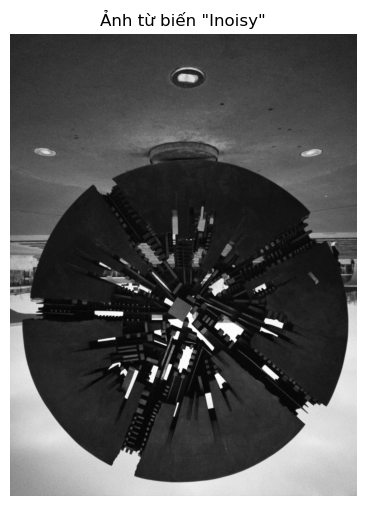

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filepath = r"F:\dnd_2017\images_raw\0001.mat"

try:
    f = h5py.File(filepath, 'r')

    print(f"Các biến có trong file .mat: {list(f.keys())}")

    variable_name = 'Inoisy' # <--- THAY THẾ TÊN BIẾN Ở ĐÂY!

    if variable_name in f:
        image_array = f[variable_name][:]

        if image_array.ndim == 2:
            image_array = image_array.T
        elif image_array.ndim == 3:
            image_array = image_array.transpose(2, 1, 0)

        print(f"\nĐã tìm thấy biến '{variable_name}'.")
        print(f"Kích thước ảnh sau khi xử lý: {image_array.shape}")

        plt.figure(figsize=(8, 6))
        plt.imshow(image_array, cmap='gray' if image_array.ndim == 2 else None)
        plt.title(f'Ảnh từ biến "{variable_name}"')
        plt.axis('off')
        plt.show()

    else:
        print(f"\nLỗi: Không tìm thấy biến '{variable_name}' trong file!")
        print("Vui lòng kiểm tra lại kết quả liệt kê ở trên và cập nhật lại biến 'variable_name'.")
    f.close()

except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại đường dẫn: {filepath}")
except Exception as e:
    print(f"Đã có lỗi xảy ra: {e}")

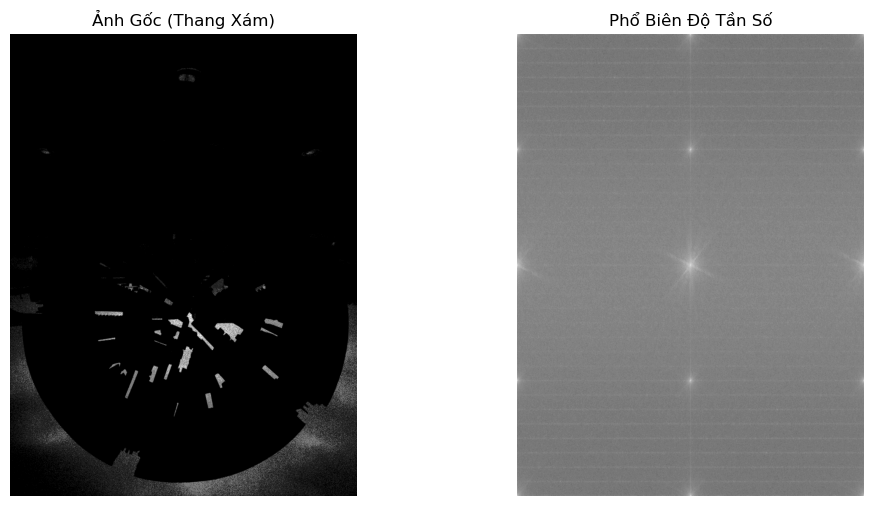

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if image_array.ndim == 3:
    gray_image = cv2.cvtColor(image_array.astype(np.uint8), cv2.COLOR_RGB2GRAY)
else:
    gray_image = image_array.astype(np.uint8)

f = np.fft.fft2(gray_image)

fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Ảnh Gốc (Thang Xám)')
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Phổ Biên Độ Tần Số')
plt.axis('off')

plt.show()

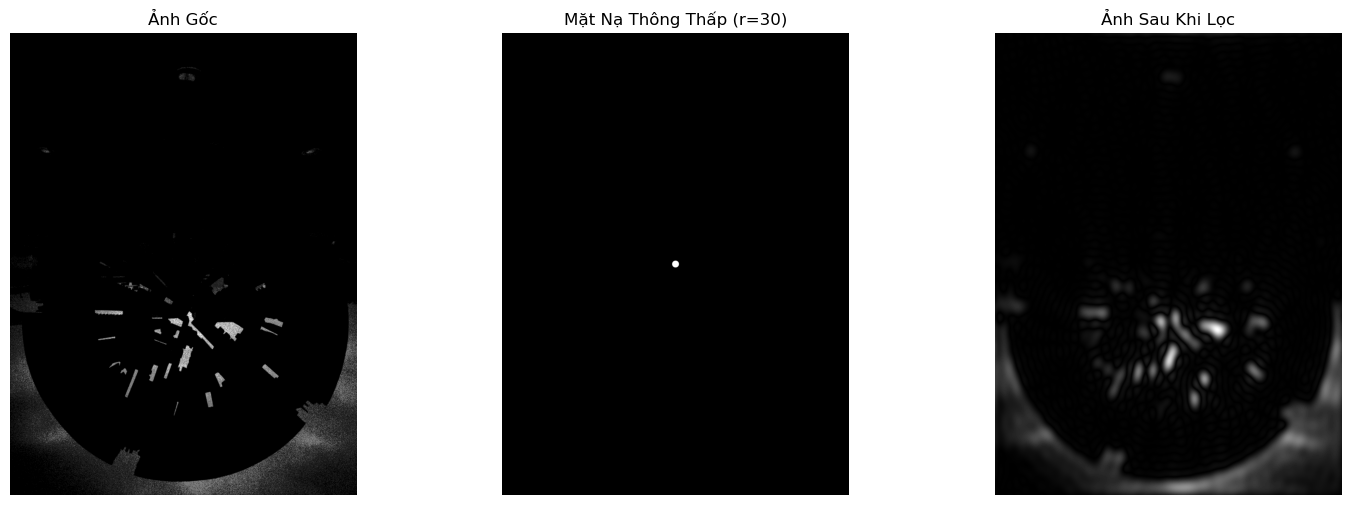

In [ ]:
rows, cols = gray_image.shape
crow, ccol = rows // 2 , cols // 2 

radius = 30
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

fshift_filtered = fshift * mask

f_ishift = np.fft.ifftshift(fshift_filtered)

img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(gray_image, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title(f'Mặt Nạ Thông Thấp (r={radius})')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_back, cmap='gray')
plt.title('Ảnh Sau Khi Lọc')
plt.axis('off')

plt.show()

Bắt đầu quá trình cho thư mục: F:\output_low_pass
Tải file info.mat thành công.

--- HOÀN THÀNH ẢNH 01/50 ---
--- HOÀN THÀNH ẢNH 02/50 ---
--- HOÀN THÀNH ẢNH 03/50 ---
--- HOÀN THÀNH ẢNH 04/50 ---
--- HOÀN THÀNH ẢNH 05/50 ---
--- HOÀN THÀNH ẢNH 06/50 ---
--- HOÀN THÀNH ẢNH 07/50 ---
--- HOÀN THÀNH ẢNH 08/50 ---
--- HOÀN THÀNH ẢNH 09/50 ---
--- HOÀN THÀNH ẢNH 10/50 ---
--- HOÀN THÀNH ẢNH 11/50 ---
--- HOÀN THÀNH ẢNH 12/50 ---
--- HOÀN THÀNH ẢNH 13/50 ---
--- HOÀN THÀNH ẢNH 14/50 ---
--- HOÀN THÀNH ẢNH 15/50 ---
--- HOÀN THÀNH ẢNH 16/50 ---
--- HOÀN THÀNH ẢNH 17/50 ---
--- HOÀN THÀNH ẢNH 18/50 ---
--- HOÀN THÀNH ẢNH 19/50 ---
--- HOÀN THÀNH ẢNH 20/50 ---
--- HOÀN THÀNH ẢNH 21/50 ---
--- HOÀN THÀNH ẢNH 22/50 ---
--- HOÀN THÀNH ẢNH 23/50 ---
--- HOÀN THÀNH ẢNH 24/50 ---
--- HOÀN THÀNH ẢNH 25/50 ---
--- HOÀN THÀNH ẢNH 26/50 ---
--- HOÀN THÀNH ẢNH 27/50 ---
--- HOÀN THÀNH ẢNH 28/50 ---
--- HOÀN THÀNH ẢNH 29/50 ---
--- HOÀN THÀNH ẢNH 30/50 ---
--- HOÀN THÀNH ẢNH 31/50 ---
--- HOÀN THÀNH ẢNH 3

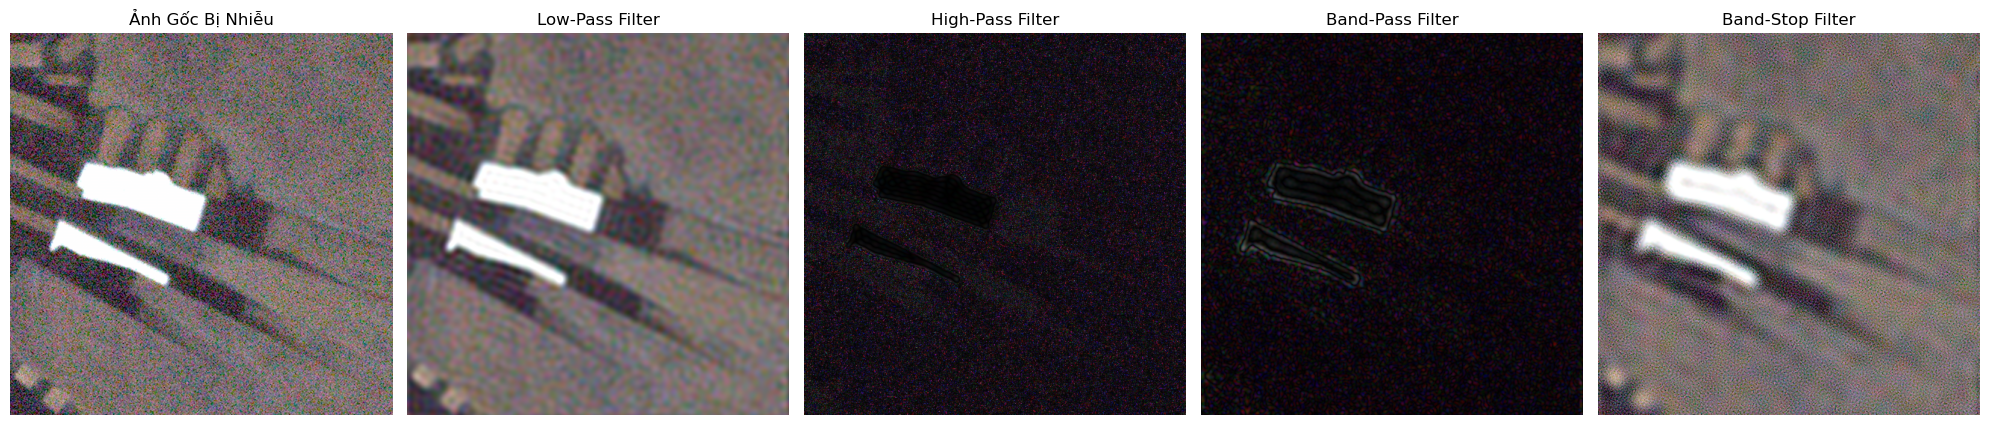


Đang hiển thị so sánh cho ảnh 7, vùng 12...


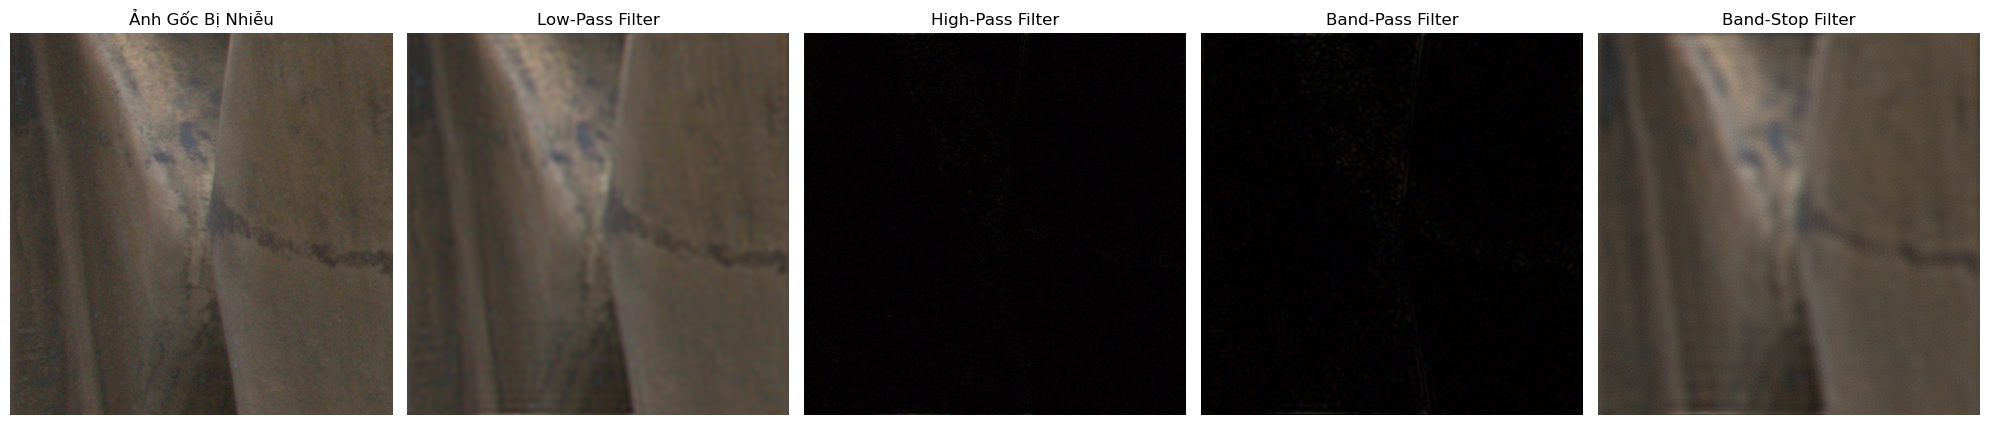


Đang tính toán và vẽ biểu đồ cho ảnh 1, vùng 5...
Đã lưu biểu đồ so sánh vào file: F:\metrics_comparison_img1_box5.png


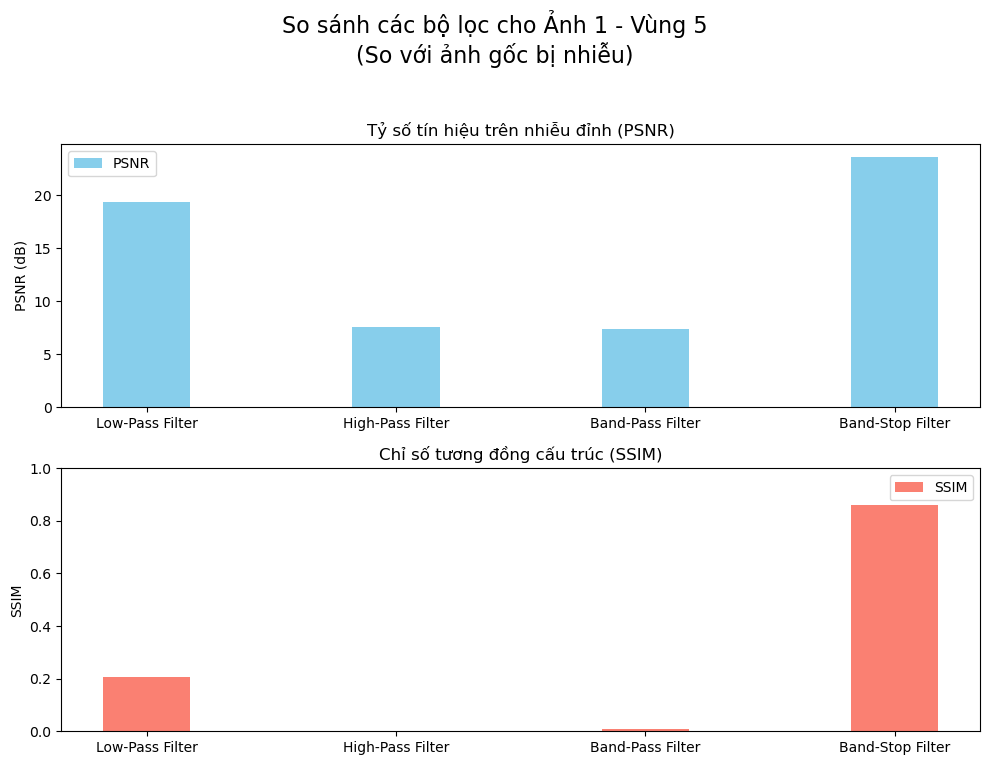

In [ ]:
import numpy as np
import scipy.io as sio
import os
import h5py
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


def apply_fourier_filter(noisy_patch, mask):
    rows, cols, channels = noisy_patch.shape
    denoised_patch = np.zeros_like(noisy_patch, dtype=np.float32)

    for i in range(channels):
        channel_noisy = noisy_patch[:, :, i]
        f = np.fft.fft2(channel_noisy)
        fshift = np.fft.fftshift(f)
        fshift_filtered = fshift * mask
        f_ishift = np.fft.ifftshift(fshift_filtered)
        channel_denoised = np.fft.ifft2(f_ishift)
        denoised_patch[:, :, i] = np.abs(channel_denoised)
        
    return denoised_patch

def low_pass_denoiser(noisy_patch, noise_info):
    rows, cols, _ = noisy_patch.shape
    crow, ccol = int(rows / 2), int(cols / 2)
    radius = 40
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)
    return apply_fourier_filter(noisy_patch, mask)

def high_pass_denoiser(noisy_patch, noise_info):
    rows, cols, _ = noisy_patch.shape
    crow, ccol = int(rows / 2), int(cols / 2)
    radius = 40
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)
    return apply_fourier_filter(noisy_patch, mask)

def band_pass_denoiser(noisy_patch, noise_info):
    rows, cols, _ = noisy_patch.shape
    crow, ccol = int(rows / 2), int(cols / 2)
    r_outer = 80
    r_inner = 20
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), r_outer, 1, thickness=-1)
    cv2.circle(mask, (ccol, crow), r_inner, 0, thickness=-1)
    return apply_fourier_filter(noisy_patch, mask)

def band_stop_denoiser(noisy_patch, noise_info):
    rows, cols, _ = noisy_patch.shape
    crow, ccol = int(rows / 2), int(cols / 2)
    r_outer = 80
    r_inner = 20
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), r_outer, 0, thickness=-1)
    cv2.circle(mask, (ccol, crow), r_inner, 1, thickness=-1)
    return apply_fourier_filter(noisy_patch, mask)


def load_nlf(info, img_id):
    nlf = {}
    nlf_h5 = info[info["nlf"][0][img_id]]
    nlf["a"] = nlf_h5["a"][0][0]
    nlf["b"] = nlf_h5["b"][0][0]
    return nlf

def load_sigma_srgb(info, img_id, bb):
    nlf_h5 = info[info["sigma_srgb"][0][img_id]]
    sigma = nlf_h5[0,bb]
    return sigma

def denoise_srgb(denoiser, data_folder, out_folder):
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    print(f'Bắt đầu quá trình cho thư mục: {out_folder}')
    infos = h5py.File(os.path.join(data_folder, 'info.mat'), 'r')
    info = infos['info']
    bb = info['boundingboxes']
    print('Tải file info.mat thành công.\n')
    for i in range(50):
        filename = os.path.join(data_folder, 'images_srgb', '%04d.mat'%(i+1))
        img = h5py.File(filename, 'r')
        Inoisy = np.float32(np.array(img['InoisySRGB']).T)
        ref = bb[0][i]
        boxes = np.array(info[ref]).T
        for k in range(20):
            idx = [int(boxes[k,0]-1), int(boxes[k,2]), int(boxes[k,1]-1), int(boxes[k,3])]
            Inoisy_crop = Inoisy[idx[0]:idx[1], idx[2]:idx[3], :].copy()
            nlf = load_nlf(info, i)
            nlf["sigma"] = load_sigma_srgb(info, i, k)
            Idenoised_crop = denoiser(Inoisy_crop, nlf)
            save_file = os.path.join(out_folder, '%04d_%02d.mat'%(i+1, k+1))
            sio.savemat(save_file, {'Idenoised_crop': Idenoised_crop})
        print(f'--- HOÀN THÀNH ẢNH {i+1:02d}/50 ---')
    print(f'*** Quá trình cho {out_folder} hoàn tất! ***\n')


def get_noisy_patch(data_folder, img_id, box_id):
    infos = h5py.File(os.path.join(data_folder, 'info.mat'), 'r')
    info = infos['info']
    bb = info['boundingboxes']
    filename_original = os.path.join(data_folder, 'images_srgb', f'{img_id:04d}.mat')
    img_original_h5 = h5py.File(filename_original, 'r')
    Inoisy_full = np.float32(np.array(img_original_h5['InoisySRGB']).T)
    ref = bb[0][img_id-1]
    boxes = np.array(info[ref]).T
    idx = [int(boxes[box_id-1,0]-1), int(boxes[box_id-1,2]), int(boxes[box_id-1,1]-1), int(boxes[box_id-1,3])]
    noisy_patch = Inoisy_full[idx[0]:idx[1], idx[2]:idx[3], :].copy()
    return np.clip(noisy_patch, 0, 1)

def visualize_all_filters(data_folder, filter_outputs, img_id, box_id):
    print(f"\nĐang hiển thị so sánh cho ảnh {img_id}, vùng {box_id}...")
    
    noisy_patch = get_noisy_patch(data_folder, img_id, box_id)
    
    num_filters = len(filter_outputs)
    fig, axes = plt.subplots(1, num_filters + 1, figsize=(20, 5))
    
    axes[0].imshow(noisy_patch)
    axes[0].set_title('Ảnh Gốc Bị Nhiễu')
    axes[0].axis('off')

    for i, (name, folder) in enumerate(filter_outputs.items()):
        filepath = os.path.join(folder, f'{img_id:04d}_{box_id:02d}.mat')
        if os.path.exists(filepath):
            denoised_data = sio.loadmat(filepath)
            denoised_crop = np.clip(denoised_data['Idenoised_crop'], 0, 1)
            axes[i+1].imshow(denoised_crop)
            axes[i+1].set_title(name)
            axes[i+1].axis('off')
        else:
            axes[i+1].set_title(f'{name}\n(File not found)')
            axes[i+1].axis('off')
            
    plt.tight_layout()
    plt.show()

def evaluate_and_plot_metrics(data_folder, filter_outputs, img_id, box_id):
    print(f"\nĐang tính toán và vẽ biểu đồ cho ảnh {img_id}, vùng {box_id}...")
    
    reference_patch = get_noisy_patch(data_folder, img_id, box_id)
    
    filter_names = list(filter_outputs.keys())
    psnr_scores = []
    ssim_scores = []

    for name, folder in filter_outputs.items():
        filepath = os.path.join(folder, f'{img_id:04d}_{box_id:02d}.mat')
        if os.path.exists(filepath):
            denoised_data = sio.loadmat(filepath)
            denoised_patch = np.clip(denoised_data['Idenoised_crop'], 0, 1)
            
            psnr_val = psnr(reference_patch, denoised_patch, data_range=1)
            ssim_val = ssim(reference_patch, denoised_patch, data_range=1, channel_axis=2, win_size=7)
            psnr_scores.append(psnr_val)
            ssim_scores.append(ssim_val)
        else:
            psnr_scores.append(0)
            ssim_scores.append(0)

    x = np.arange(len(filter_names))
    width = 0.35
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(f'So sánh các bộ lọc cho Ảnh {img_id} - Vùng {box_id}\n(So với ảnh gốc bị nhiễu)', fontsize=16)

    ax1.bar(x, psnr_scores, width, label='PSNR', color='skyblue')
    ax1.set_ylabel('PSNR (dB)')
    ax1.set_title('Tỷ số tín hiệu trên nhiễu đỉnh (PSNR)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(filter_names)
    ax1.legend()

    ax2.bar(x, ssim_scores, width, label='SSIM', color='salmon')
    ax2.set_ylabel('SSIM')
    ax2.set_title('Chỉ số tương đồng cấu trúc (SSIM)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(filter_names)
    ax2.legend()
    ax2.set_ylim(0, 1)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    chart_filename = os.path.join('F:\\', f'metrics_comparison_img{img_id}_box{box_id}.png')
    plt.savefig(chart_filename)
    print(f"Đã lưu biểu đồ so sánh vào file: {chart_filename}")
    plt.show()


if __name__ == '__main__':
    data_folder = r'F:\dnd_2017' 

    filters_to_run = {
        'Low-Pass Filter': (low_pass_denoiser, r'F:\output_low_pass'),
        'High-Pass Filter': (high_pass_denoiser, r'F:\output_high_pass'),
        'Band-Pass Filter': (band_pass_denoiser, r'F:\output_band_pass'),
        'Band-Stop Filter': (band_stop_denoiser, r'F:\output_band_stop')
    }

    if not os.path.isdir(data_folder) or not os.path.exists(os.path.join(data_folder, 'info.mat')):
        print(f"LỖI: Không tìm thấy thư mục dữ liệu '{data_folder}' hoặc file 'info.mat' bên trong.")
    else:
        for name, (denoiser_func, out_folder) in filters_to_run.items():
            denoise_srgb(denoiser_func, data_folder, out_folder)
        
        output_folders = {name: folder for name, (_, folder) in filters_to_run.items()}
        
        visualize_all_filters(data_folder, output_folders, img_id=1, box_id=5)
        visualize_all_filters(data_folder, output_folders, img_id=7, box_id=12)
        
        evaluate_and_plot_metrics(data_folder, output_folders, img_id=1, box_id=5)


Đang hiển thị so sánh cho ảnh 1, vùng 10...


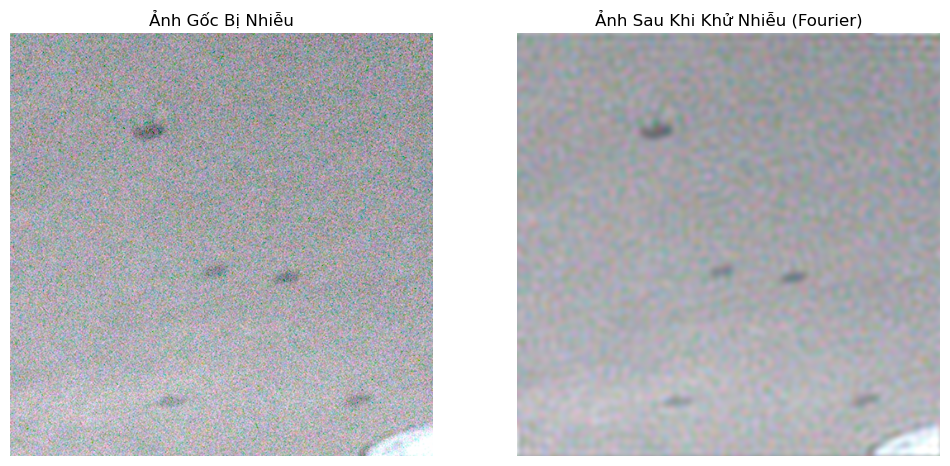


Đang hiển thị so sánh cho ảnh 7, vùng 12...


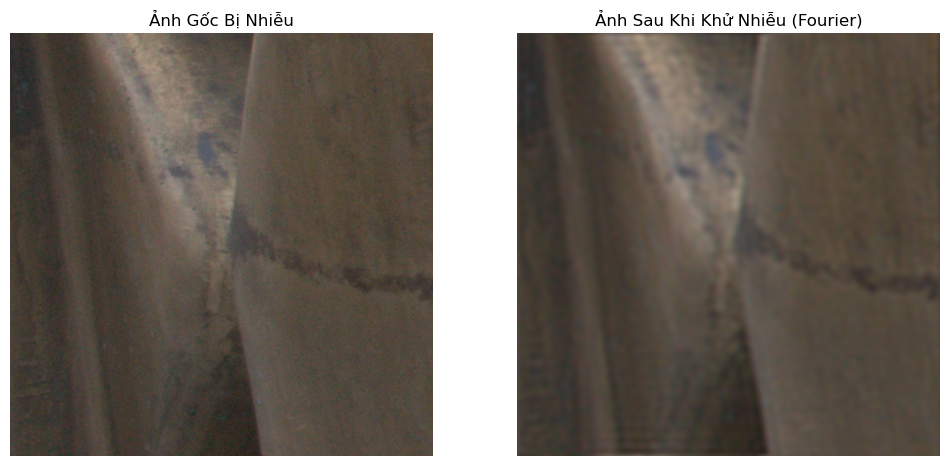

In [15]:
visualize_comparison(data_folder, out_folder, img_id=1, box_id=10)
visualize_comparison(data_folder, out_folder, img_id=7, box_id=12)

Tất cả các thư mục kết quả đã tồn tại. Bắt đầu tạo báo cáo...

Đang tính toán và vẽ biểu đồ cho ảnh 1, vùng 5...
Đã lưu biểu đồ so sánh vào file: F:\metrics_comparison_img1_box5.png


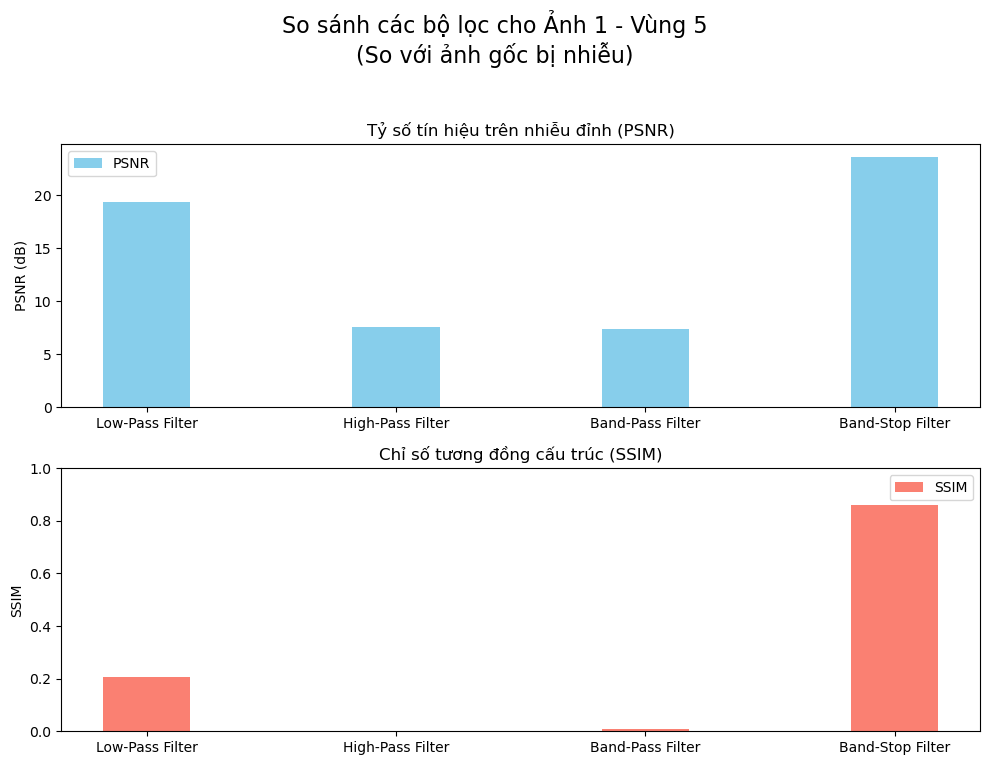


Đang tạo visualization tổng hợp cho báo cáo...
Đã lưu ảnh tổng hợp báo cáo vào: F:\Fourier_Filters_Report_Final.png


In [ ]:
import numpy as np
import scipy.io as sio
import os
import h5py
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


def get_noisy_patch(data_folder, img_id, box_id):
    infos = h5py.File(os.path.join(data_folder, 'info.mat'), 'r')
    info = infos['info']
    bb = info['boundingboxes']
    filename_original = os.path.join(data_folder, 'images_srgb', f'{img_id:04d}.mat')
    img_original_h5 = h5py.File(filename_original, 'r')
    Inoisy_full = np.float32(np.array(img_original_h5['InoisySRGB']).T)
    ref = bb[0][img_id-1]
    boxes = np.array(info[ref]).T
    idx = [int(boxes[box_id-1,0]-1), int(boxes[box_id-1,2]), int(boxes[box_id-1,1]-1), int(boxes[box_id-1,3])]
    noisy_patch = Inoisy_full[idx[0]:idx[1], idx[2]:idx[3], :].copy()
    return np.clip(noisy_patch, 0, 1)

def evaluate_and_plot_metrics(data_folder, filter_outputs, img_id, box_id):
    print(f"\nĐang tính toán và vẽ biểu đồ cho ảnh {img_id}, vùng {box_id}...")
    
    reference_patch = get_noisy_patch(data_folder, img_id, box_id)
    filter_names = list(filter_outputs.keys())
    psnr_scores, ssim_scores = [], []

    for name, folder in filter_outputs.items():
        filepath = os.path.join(folder, f'{img_id:04d}_{box_id:02d}.mat')
        if os.path.exists(filepath):
            denoised_data = sio.loadmat(filepath)
            denoised_patch = np.clip(denoised_data['Idenoised_crop'], 0, 1)
            psnr_val = psnr(reference_patch, denoised_patch, data_range=1)
            ssim_val = ssim(reference_patch, denoised_patch, data_range=1, channel_axis=2, win_size=7)
            psnr_scores.append(psnr_val)
            ssim_scores.append(ssim_val)
        else:
            psnr_scores.append(0)
            ssim_scores.append(0)

    x = np.arange(len(filter_names))
    width = 0.35
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(f'So sánh các bộ lọc cho Ảnh {img_id} - Vùng {box_id}\n(So với ảnh gốc bị nhiễu)', fontsize=16)

    ax1.bar(x, psnr_scores, width, label='PSNR', color='skyblue')
    ax1.set_ylabel('PSNR (dB)'); ax1.set_title('Tỷ số tín hiệu trên nhiễu đỉnh (PSNR)'); ax1.set_xticks(x); ax1.set_xticklabels(filter_names); ax1.legend()
    ax2.bar(x, ssim_scores, width, label='SSIM', color='salmon')
    ax2.set_ylabel('SSIM'); ax2.set_title('Chỉ số tương đồng cấu trúc (SSIM)'); ax2.set_xticks(x); ax2.set_xticklabels(filter_names); ax2.legend(); ax2.set_ylim(0, 1)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    chart_filename = os.path.join('F:\\', f'metrics_comparison_img{img_id}_box{box_id}.png')
    plt.savefig(chart_filename)
    print(f"Đã lưu biểu đồ so sánh vào file: {chart_filename}")
    plt.show()

def create_report_visualization(data_folder, filter_outputs, img_ids_to_show, box_ids_to_show, save_path):
    print("\nĐang tạo visualization tổng hợp cho báo cáo...")
    
    num_images, num_boxes, num_filters = len(img_ids_to_show), len(box_ids_to_show), len(filter_outputs)
    num_cols, num_rows = 1 + num_filters, num_images * num_boxes
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))
    fig.suptitle('Tổng hợp kết quả các bộ lọc Fourier', fontsize=24, y=1.0)

    col_titles = ['Ảnh Gốc Bị Nhiễu'] + list(filter_outputs.keys())
    if num_rows > 1:
        for ax, col_title in zip(axes[0], col_titles):
            ax.set_title(col_title, fontsize=16, pad=20)
    else: 
        for i, col_title in enumerate(col_titles):
             axes[i].set_title(col_title, fontsize=16, pad=20)

    current_row = 0
    for img_id in img_ids_to_show:
        for box_id in box_ids_to_show:
            if current_row >= num_rows: break
            
            row_axes = axes[current_row, :] if num_rows > 1 else axes

            noisy_patch = get_noisy_patch(data_folder, img_id, box_id)
            row_axes[0].imshow(noisy_patch)
            row_axes[0].axis('off')
            row_axes[0].text(-0.1, 0.5, f'Ảnh {img_id}\nVùng {box_id}', transform=row_axes[0].transAxes, ha="right", va="center", fontsize=14, rotation=90)

            for i, (name, folder) in enumerate(filter_outputs.items()):
                ax = row_axes[i + 1]
                filepath = os.path.join(folder, f'{img_id:04d}_{box_id:02d}.mat')
                if os.path.exists(filepath):
                    denoised_data = sio.loadmat(filepath)
                    denoised_crop = np.clip(denoised_data['Idenoised_crop'], 0, 1)
                    ax.imshow(denoised_crop)
                else:
                    ax.text(0.5, 0.5, 'Không tìm thấy file', ha='center', va='center')
                ax.axis('off')
            
            current_row += 1

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.savefig(save_path, bbox_inches='tight', dpi=150)
    print(f"Đã lưu ảnh tổng hợp báo cáo vào: {save_path}")
    plt.close(fig)


if __name__ == '__main__':
    data_folder = r'F:\dnd_2017'
    
    output_folders = {
        'Low-Pass Filter': r'F:\output_low_pass',
        'High-Pass Filter': r'F:\output_high_pass',
        'Band-Pass Filter': r'F:\output_band_pass',
        'Band-Stop Filter': r'F:\output_band_stop'
    }

    all_folders_exist = True
    for folder in output_folders.values():
        if not os.path.isdir(folder):
            print(f"LỖI: Thư mục kết quả '{folder}' không tồn tại. Vui lòng chạy file 'run_denoising.py' trước.")
            all_folders_exist = False
            break

    if all_folders_exist:
        print("Tất cả các thư mục kết quả đã tồn tại. Bắt đầu tạo báo cáo...")

        evaluate_and_plot_metrics(data_folder, output_folders, img_id=1, box_id=5)
        
        report_images = [1, 7, 25]
        report_boxes = [5, 12]
        report_save_path = r'F:\Fourier_Filters_Report_Final.png'
        
        create_report_visualization(data_folder, 
                                    output_folders, 
                                    report_images, 
                                    report_boxes, 
                                    report_save_path)